In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft as fft
import scipy.signal as sgn
import re
import os

In [2]:
def esd(yt, fs):
    # computes ESD of a signal yt, keeping only positive frequencies! -> NOTE: this implies that total energy is halved
    N = len(yt)
    f = fft.rfftfreq(N, 1/fs)
    Sxx = np.square(1 / fs) *  np.square(np.abs(fft.rfft(yt)))
    
    return f, Sxx

In [3]:
def bode_plot(kp, ki, kd):
    num = [kd, kp, ki]
    den = [1, 0]
    sys = sgn.TransferFunction(num, den)
    w, mag, phase = sgn.bode(sys)
    plt.figure(figsize=(12,3))
    plt.title('Bode magnitude plot')
    plt.xlabel('Frequency [Hz]')
    plt.semilogx(w, mag)
    plt.figure(figsize=(12,3))
    plt.title('Bode phase plot')
    plt.xlabel('Frequency [Hz]')
    plt.semilogx(w, phase)
    plt.show()

In [4]:
def plot_signals(file, time_range=None):
    signals_df = pd.read_csv(file, sep=',', header=0)
    
    pattern = r"fUpdate=(\d+)Hz_PID=\(([\d\.]+),([\d\.]+),([\d\.]+)\)_dt=([\d\.]+)\.csv"
    match = re.search(pattern, file)
    
    dt = float(match.group(5))
    f_update = float(match.group(1))
    
    k_subsample = int(1 / (dt * f_update))
    
    x_t = np.array(signals_df['Time'], dtype=float)[::k_subsample]
    y_rv = np.array(signals_df['Velocity'], dtype=float)[::k_subsample]
    y_tv = np.array(signals_df['Target Velocity'], dtype=float)[::k_subsample]
    y_tp = np.array(signals_df['Throttle'], dtype=float)[::k_subsample]
    y_bp = np.array(signals_df['Brake'], dtype=float)[::k_subsample]
    
    plt.figure(figsize=(30,6))
    plt.title('Target Velocity vs. Real Velocity')
    plt.xlabel('Time [s]')
    plt.ylabel('Velocity [m/s]')
    plt.xlim(time_range)
    plt.plot(x_t, y_tv, label='Target velocity')
    plt.plot(x_t, y_rv, label='Real velocity')
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(30,6))
    plt.title('Throttle and brake')
    plt.xlabel('Time [s]')
    plt.ylabel('Relative throttle/brake')
    plt.plot(x_t, y_tp, label='Throttle')
    plt.plot(x_t, - y_bp, label='Brake')
    plt.xlim(time_range)
    plt.legend(loc="lower right")
    plt.show()

In [5]:
def plot_spectrum(file):
    signals_df = pd.read_csv(file, sep=',', header=0)
    pattern = r"fUpdate=(\d+)Hz_PID=\(([\d\.]+),([\d\.]+),([\d\.]+)\)_dt=([\d\.]+)\.csv"
    match = re.search(pattern, file)
    
    f_update = float(match.group(1))
    
    k_subsample = int(1 / (dt * f_update))
    
    x_t = np.array(signals_df['Time'], dtype=float)[::k_subsample]
    y_rv = np.array(signals_df['Velocity'], dtype=float)[::k_subsample]
    y_tv = np.array(signals_df['Target Velocity'], dtype=float)[::k_subsample]
    y_tp = np.array(signals_df['Throttle'], dtype=float)[::k_subsample]
    y_bp = np.array(signals_df['Brake'], dtype=float)[::k_subsample]    
    
    duration = x_t[-1] - x_t[0]
    fs = 10
    N = len(y_tv)
    yf = fft.rfft(y_tp)
    xf = fft.rfftfreq(N, 1/fs)

    plt.figure(figsize=(20,5))
    # plt.xlim(0, 100)
    # plt.ylim(0,0.01)
    plt.title("Spectrum of throttle")
    plt.xlabel("frequency [Hz]")
    plt.ylabel("relative pressure")
    plt.plot(xf, np.abs(yf) * 2 / (fs * duration))
    plt.show()

In [17]:
file = 'FTPfollowing_slowAgent_fUpdate=10Hz_PID=(0.1,0.01,0.01)_dt=0.005.csv'

In [18]:
pattern = r"fUpdate=(\d+)Hz_PID=\(([\d\.]+),([\d\.]+),([\d\.]+)\)_dt=([\d\.]+)\.csv"
match = re.search(pattern, 'collectedData_slowAgent/' + file)

if match:
    signals_df = pd.read_csv('collectedData_slowAgent/' + file, sep=',', header=0)
    
    dt = float(match.group(5))
    f_update = int(match.group(1))
    
    k_subsample = int(1 / (dt * f_update))
    
    x_t = np.array(signals_df['Time'], dtype=float)[::k_subsample]
    y_rv = np.array(signals_df['Velocity'], dtype=float)[::k_subsample]
    y_tv = np.array(signals_df['Target Velocity'], dtype=float)[::k_subsample]
    y_tp = np.array(signals_df['Throttle'], dtype=float)[::k_subsample]
    y_bp = np.array(signals_df['Brake'], dtype=float)[::k_subsample]

In [56]:
f, Sxx = esd(y_tp, f_update)
np.mean(Sxx)

36.099411773481094

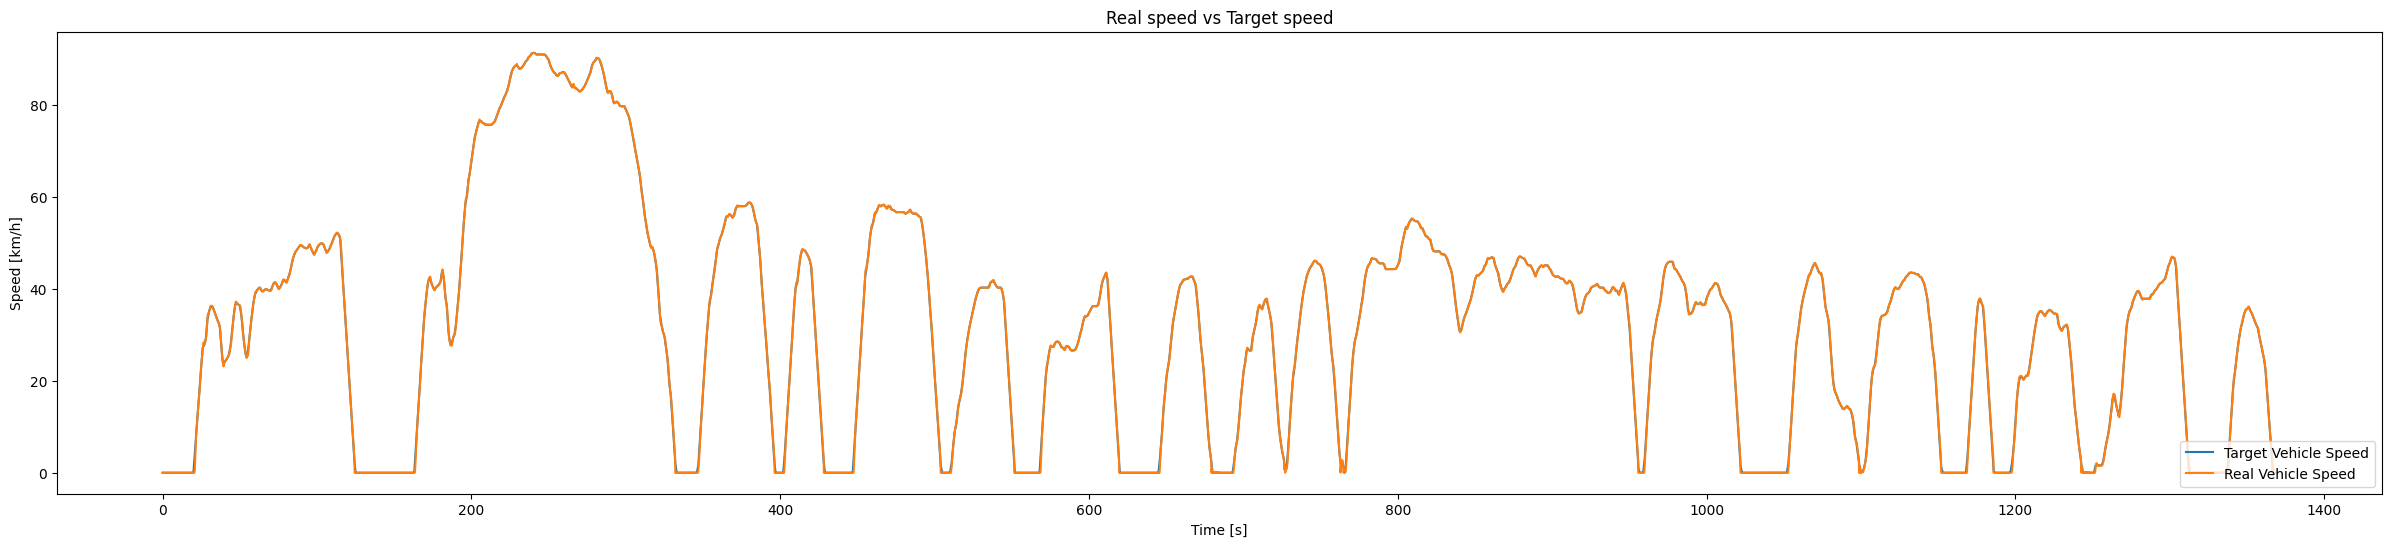

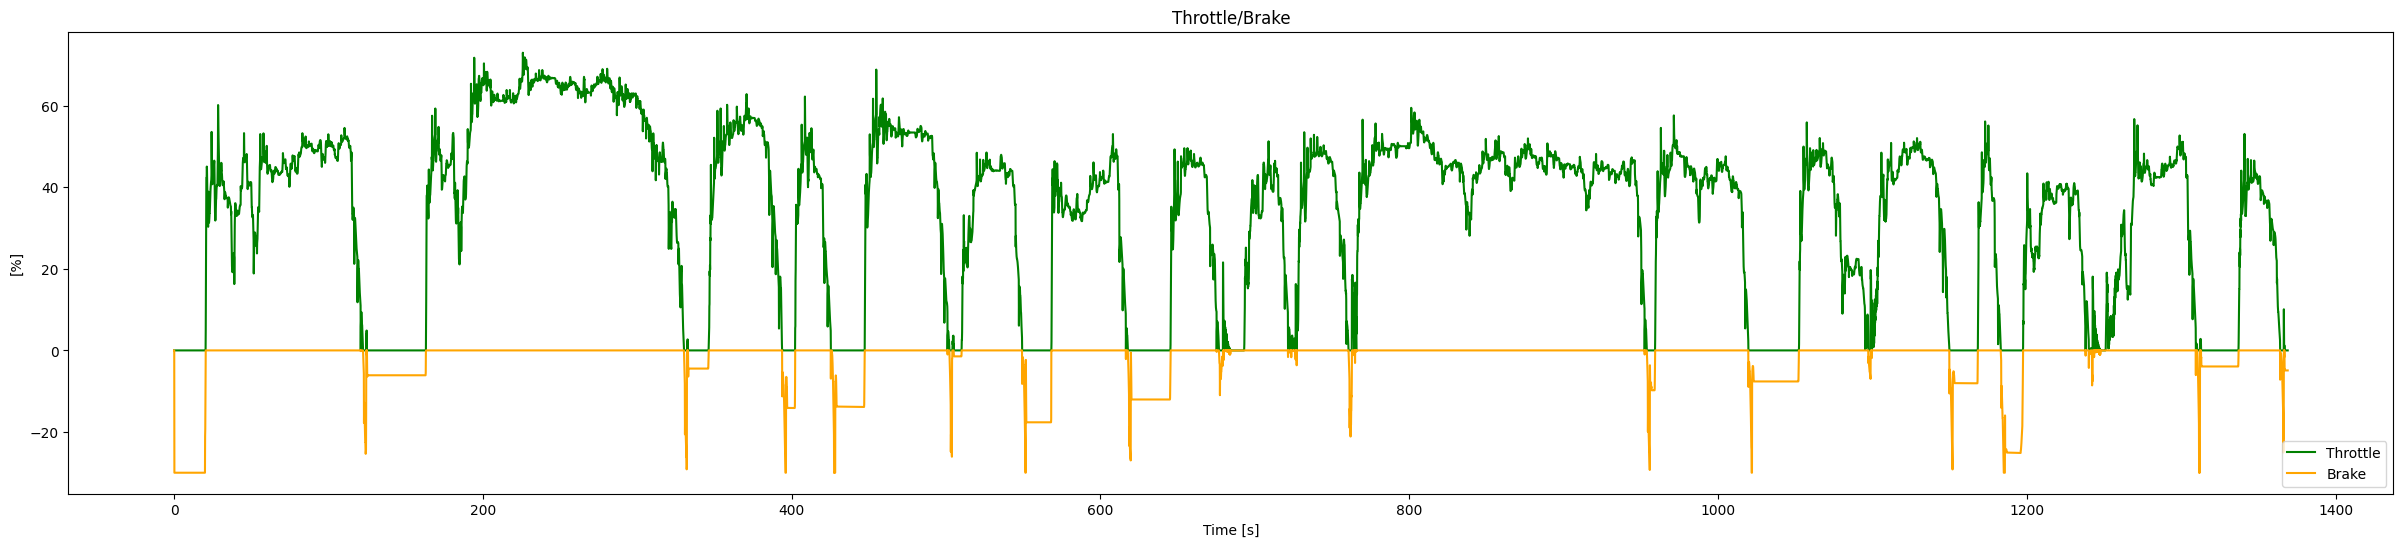

In [21]:
plt.figure(figsize=(30,6))
plt.title("Real speed vs Target speed")
plt.ylabel("Speed [km/h]")
plt.xlabel("Time [s]")
plt.plot(x_t, y_tv, label='Target Vehicle Speed')
plt.plot(x_t, y_rv, label='Real Vehicle Speed')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(30,6))
plt.title("Throttle/Brake")
plt.ylabel("[%]")
plt.xlabel("Time [s]")
plt.plot(x_t, 100 * y_tp, label='Throttle', color='green')
plt.plot(x_t, -100 * y_bp, label='Brake', color='orange')
plt.legend(loc="lower right")
plt.show()

In [22]:
N = len(y_tv)
yf = fft.rfft(y_tp)
xf = fft.rfftfreq(N, 1/f_update)

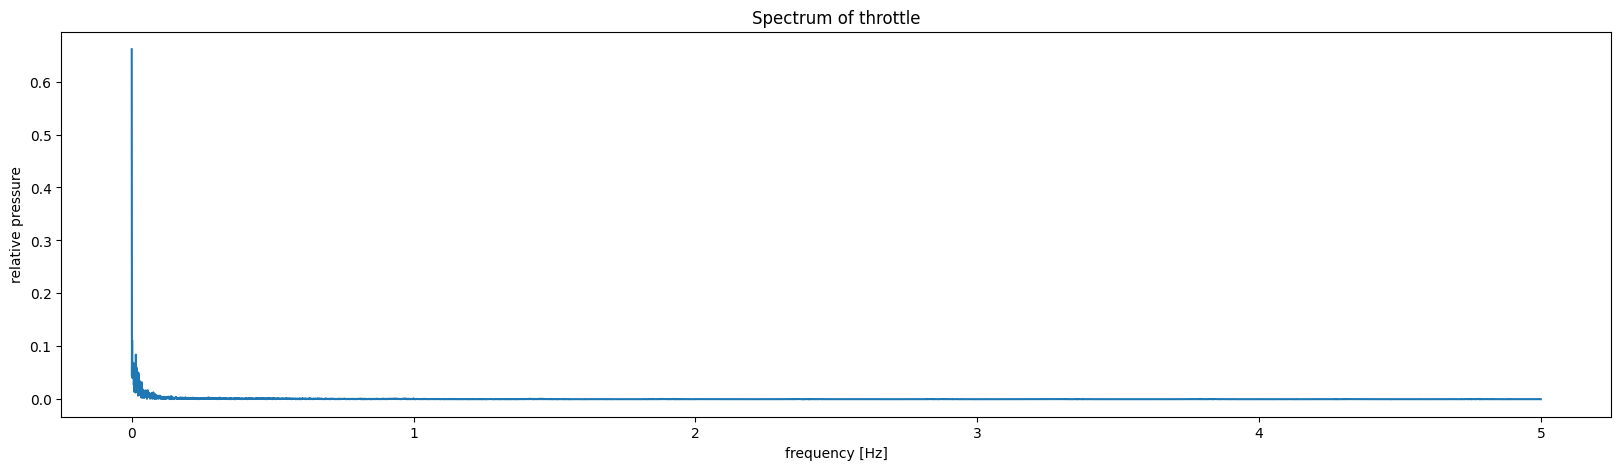

In [24]:
duration = x_t[-1] - x_t[0]
plt.figure(figsize=(20,5))
# plt.xlim(0, 100)
# plt.ylim(0,0.01)
plt.title("Spectrum of throttle")
plt.xlabel("frequency [Hz]")
plt.ylabel("relative pressure")
plt.plot(xf, np.abs(yf) * 2 / (f_update * duration))
plt.show()

In [63]:
new_yf = []
k = 1.1
for the_yf in yf:
    new_yf.append(k * the_yf)

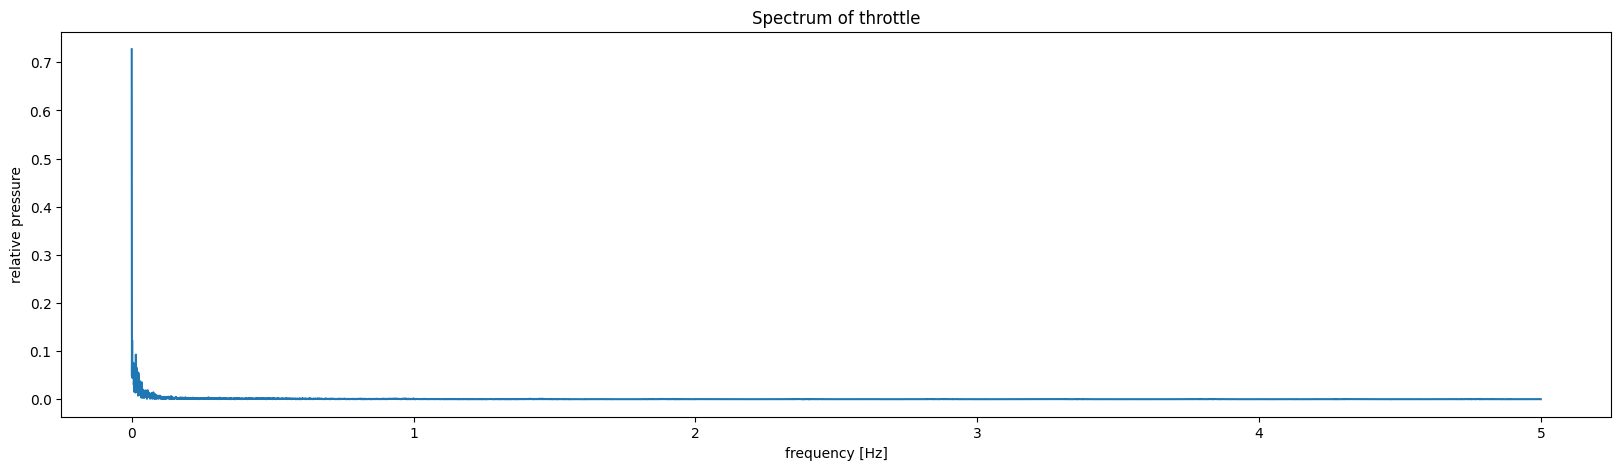

In [64]:
duration = x_t[-1] - x_t[0]
plt.figure(figsize=(20,5))
plt.title("Spectrum of throttle")
plt.xlabel("frequency [Hz]")
plt.ylabel("relative pressure")
plt.plot(xf, np.abs(new_yf) * 2 / (f_update * duration))
plt.show()

In [65]:
new_y_tp = fft.irfft(new_yf)
new_y_tp = np.abs(new_y_tp)

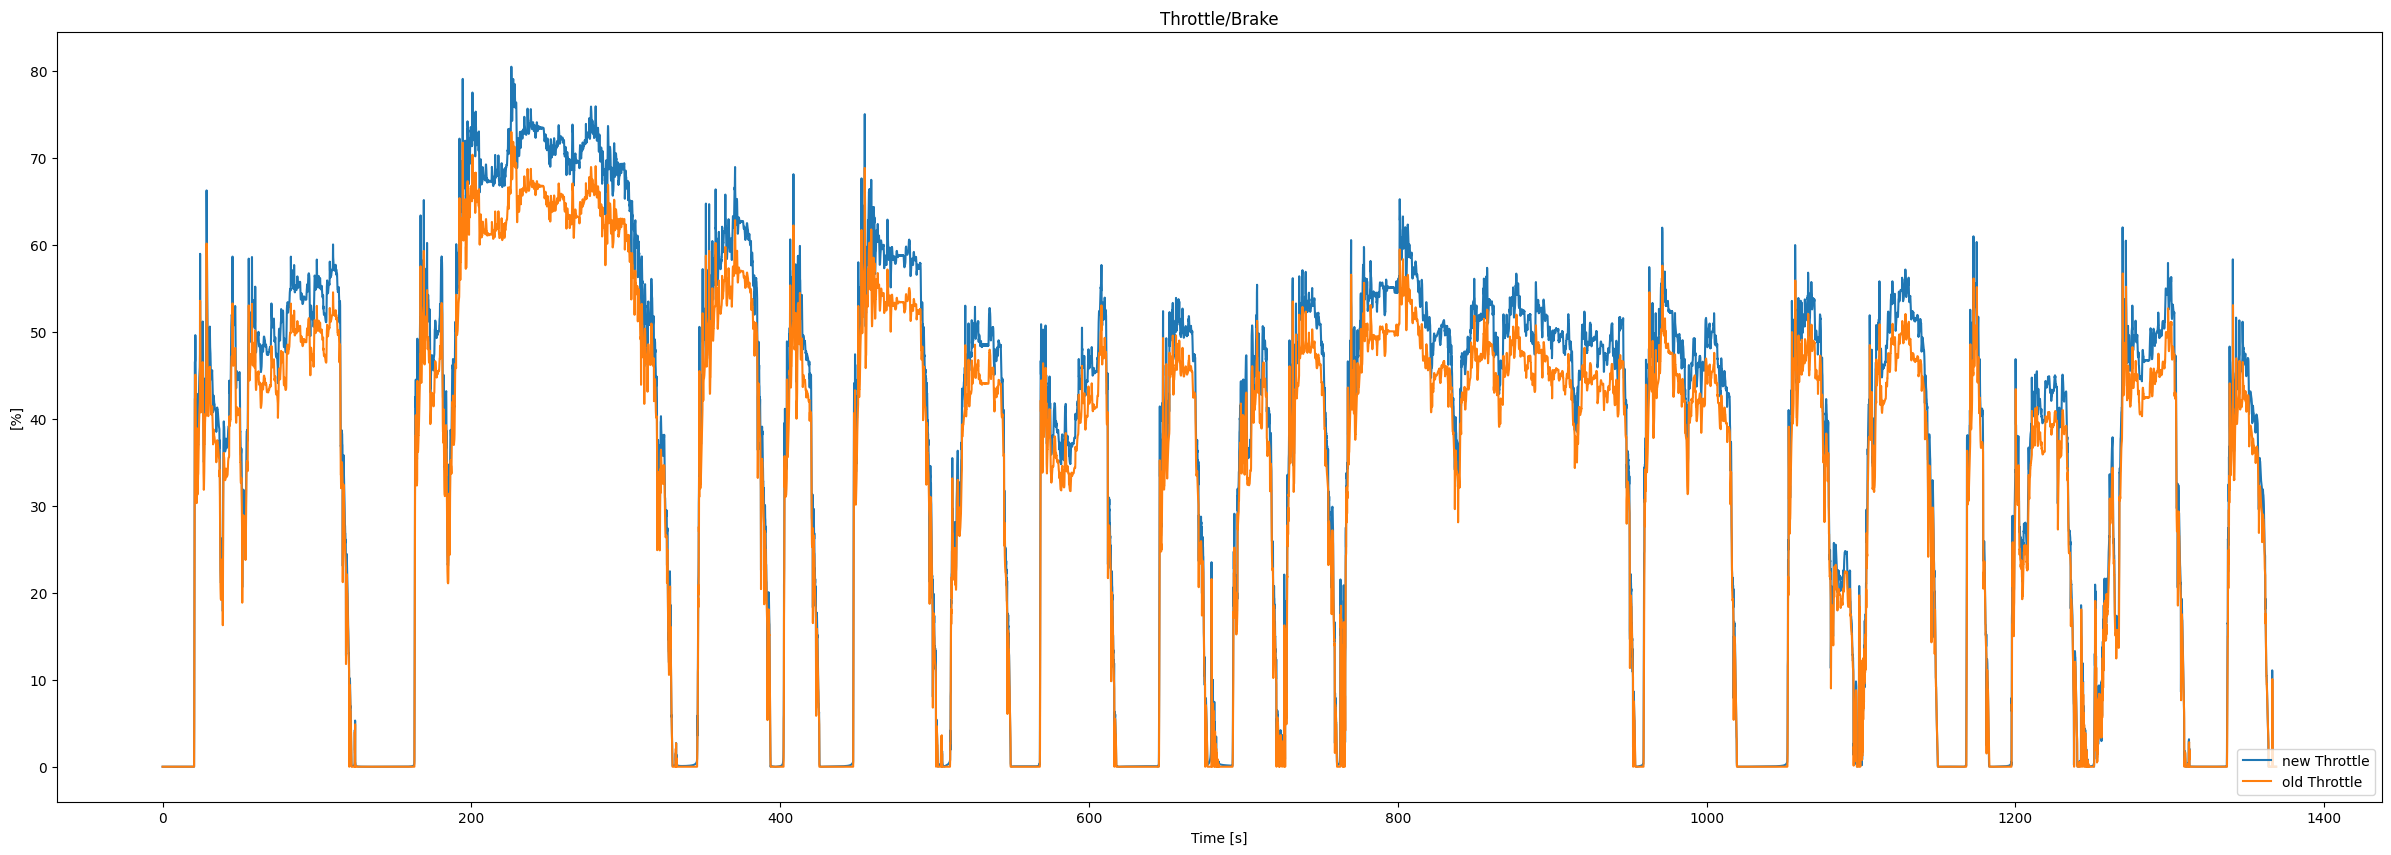

In [66]:
plt.figure(figsize=(30,10))
plt.title("Throttle/Brake")
plt.ylabel("[%]")
plt.xlabel("Time [s]")
plt.plot(x_t[:-1], 100 * new_y_tp, label='new Throttle')
plt.plot(x_t, 100 * y_tp, label='old Throttle')
plt.legend(loc="lower right")
plt.show()

In [67]:
f, Sxx = esd(new_y_tp, f_update)
np.mean(Sxx)

43.69606630846294

## Apply back to the simulation the scaled throttle signal

In [100]:
import carla
from time import perf_counter
import sys
import csv

try:
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + os.sep + "carla")
except IndexError:
    pass

from agents.navigation.behavior_agent import BehaviorAgent 
from agents.navigation.basic_agent import BasicAgent
from agents.navigation.local_planner import LocalPlanner, RoadOption
from agents.navigation.global_route_planner import GlobalRoutePlanner


 #### Simulation setup

In [70]:
dt = 0.005
sync = True
render = True

In [71]:
# Connect the client and set up bp library and spawn points
client = carla.Client('localhost', 2000) 
client.set_timeout(12.0) 

world = client.get_world()

settings = world.get_settings()
settings.no_rendering_mode = not render
settings.fixed_delta_seconds = dt
settings.synchronous_mode = sync
world.apply_settings(settings)
world = client.load_world('Town04', reset_settings=False)

bp_lib = world.get_blueprint_library() 
spawn_points = world.get_map().get_spawn_points() 

#### FTP-75 import

In [74]:
df = pd.read_csv("FTP-75-cycle" + os.sep + "FTP-75.csv")
df.drop(index=0, inplace=True, axis=0)
df = df.dropna(axis='index')
df['Phase'] = df['Phase'].astype(int)
df = df[(df['Phase'] == 1) | (df['Phase'] == 2)]
df.drop('Phase', inplace=True, axis=1)

ftp_v = np.array(df['Set Spd'], dtype=float)
ftp_t = np.array(df['Time'], dtype=float)
# converting from mph to km/h
ftp_v = 1.60934 * ftp_v

#### Trajectory definition

In [75]:
# Get the map and the global route planner
grp = GlobalRoutePlanner(world.get_map(), 2.0)

# Set the plan
route_ids = [75,100,92,272,134,138,130,296,222,212,139,352,336]
waypoints = [spawn_points[idx] for idx in route_ids]
plan = []

# Draw only the spawn points locations that are part of the route
for idx in route_ids:
    world.debug.draw_string(spawn_points[idx].location, str(idx), life_time=15, color=carla.Color(255,0,0))

for i in range(len(waypoints)-1):
    route = grp.trace_route(waypoints[i].location, waypoints[i+1].location)
    route.pop(0)    # prevents first element of every partial route to be added twice, resulting in unexpected
                    # decelerations of the vehicle when it gets to the chosen spawn points
    for x in route:
        plan.append(x)

#### Agent definition

In [76]:
vehicle = None

In [105]:
KP = 0.1
KI = 0.01
KD = 0.01

# reset vehicle
if vehicle is not None:
    vehicle.destroy()
vehicle_bp = bp_lib.find('vehicle.tesla.model3') 
vehicle = world.try_spawn_actor(vehicle_bp, spawn_points[79])
# set up the agent
agent = BasicAgent(vehicle, opt_dict={'dt' : dt, 'longitudinal_control_dict' : {'K_P': KP, 'K_I': KI, 'K_D': KD, 'dt': dt}})
agent.set_global_plan(plan=plan, stop_waypoint_creation=False)
agent.ignore_traffic_lights(active=True)
agent.ignore_stop_signs(active=True)
agent.follow_speed_limits(value=False)

#### Init cycle

In [106]:
# first part of the init cycle makes the vehicle reach and follow a constant speed and then stop.
# second cycle is used to reset the vehicle's control variables
target_velocity = 30
duration = 20
velocity_array = []
target_velocity_array = []
throttle_array = []
brake_array = []
time_array = []

t0 = world.get_snapshot().timestamp.elapsed_seconds
while True:
    if sync:
        world.tick()

    t = world.get_snapshot().timestamp.elapsed_seconds
    velocity = vehicle.get_velocity()
    control = vehicle.get_control()

    time_array.append(t - t0)

    if time_array[-1] >= duration - 5:
        agent.set_target_speed(0)
    else:
        agent.set_target_speed(target_velocity)
        
    vehicle.apply_control(agent.run_step())

    if time_array[-1] >= duration:
        break       
        
velocity_array.clear()
target_velocity_array.clear()
throttle_array.clear()
brake_array.clear()
time_array.clear()

t0 = world.get_snapshot().timestamp.elapsed_seconds
while True:
    if sync:
        world.tick()
    
    t = world.get_snapshot().timestamp.elapsed_seconds
    time_array.append(t - t0)
    vehicle.apply_control(carla.VehicleControl(throttle=0, brake=0, steer=0))

    if time_array[-1] >= 5:
        break   
    
velocity_array.clear()
target_velocity_array.clear()
throttle_array.clear()
brake_array.clear()
time_array.clear()


#### Simulate vehicle behavior applying back the control signals that have been subsampled at 10 Hz

In [107]:
f_subSampling = 10

In [108]:
velocity_array = []
target_velocity_array = []
throttle_array = []
brake_array = []
time_array = []
filename = 'tests_with_scale/FTP-75_KP={},KI={},KD={}_scale={}.csv'.format(KP, KI, KD, k)

with open(filename, mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Time', 'Velocity', 'Target Velocity', 'Throttle', 'Brake'])
    
    t0 = world.get_snapshot().timestamp.elapsed_seconds
    T_S = perf_counter()

    while True:
        if sync:
            world.tick()

        t = world.get_snapshot().timestamp.elapsed_seconds
        
        target_velocity = ftp_v[int(10 * round(t - t0, 1))]
        velocity = vehicle.get_velocity()
        agent.set_target_speed(target_velocity)
        # Create the control that will be applied to the vehicle combining old throttle and brake signals with the new steer signal
        control = carla.VehicleControl(throttle=new_y_tp[int(f_subSampling * round(t - t0, 1)) - 1], brake=y_bp[int(f_subSampling * round(t - t0, 1)) - 1], steer=agent.run_step().steer)

        velocity_array.append(3.6 * np.sqrt((float(velocity.x)) ** 2 + (float(velocity.y)) ** 2 + (float(velocity.z)) ** 2))
        target_velocity_array.append(target_velocity)
        throttle_array.append(control.throttle)
        brake_array.append(control.brake)
        time_array.append(t - t0)
        
        writer.writerow([time_array[-1], velocity_array[-1], target_velocity_array[-1], throttle_array[-1], brake_array[-1]])

                
        # Apply the control composed by throttle and brake from the subsampled signals, and the steer computed by the agent considering the target velocity from the FTP-75 cycle
        vehicle.apply_control(control)
        
        if time_array[-1] >= ftp_t[-1]:
            break 
    print("Computation time: ", perf_counter() - T_S) 

Computation time:  1121.7281613


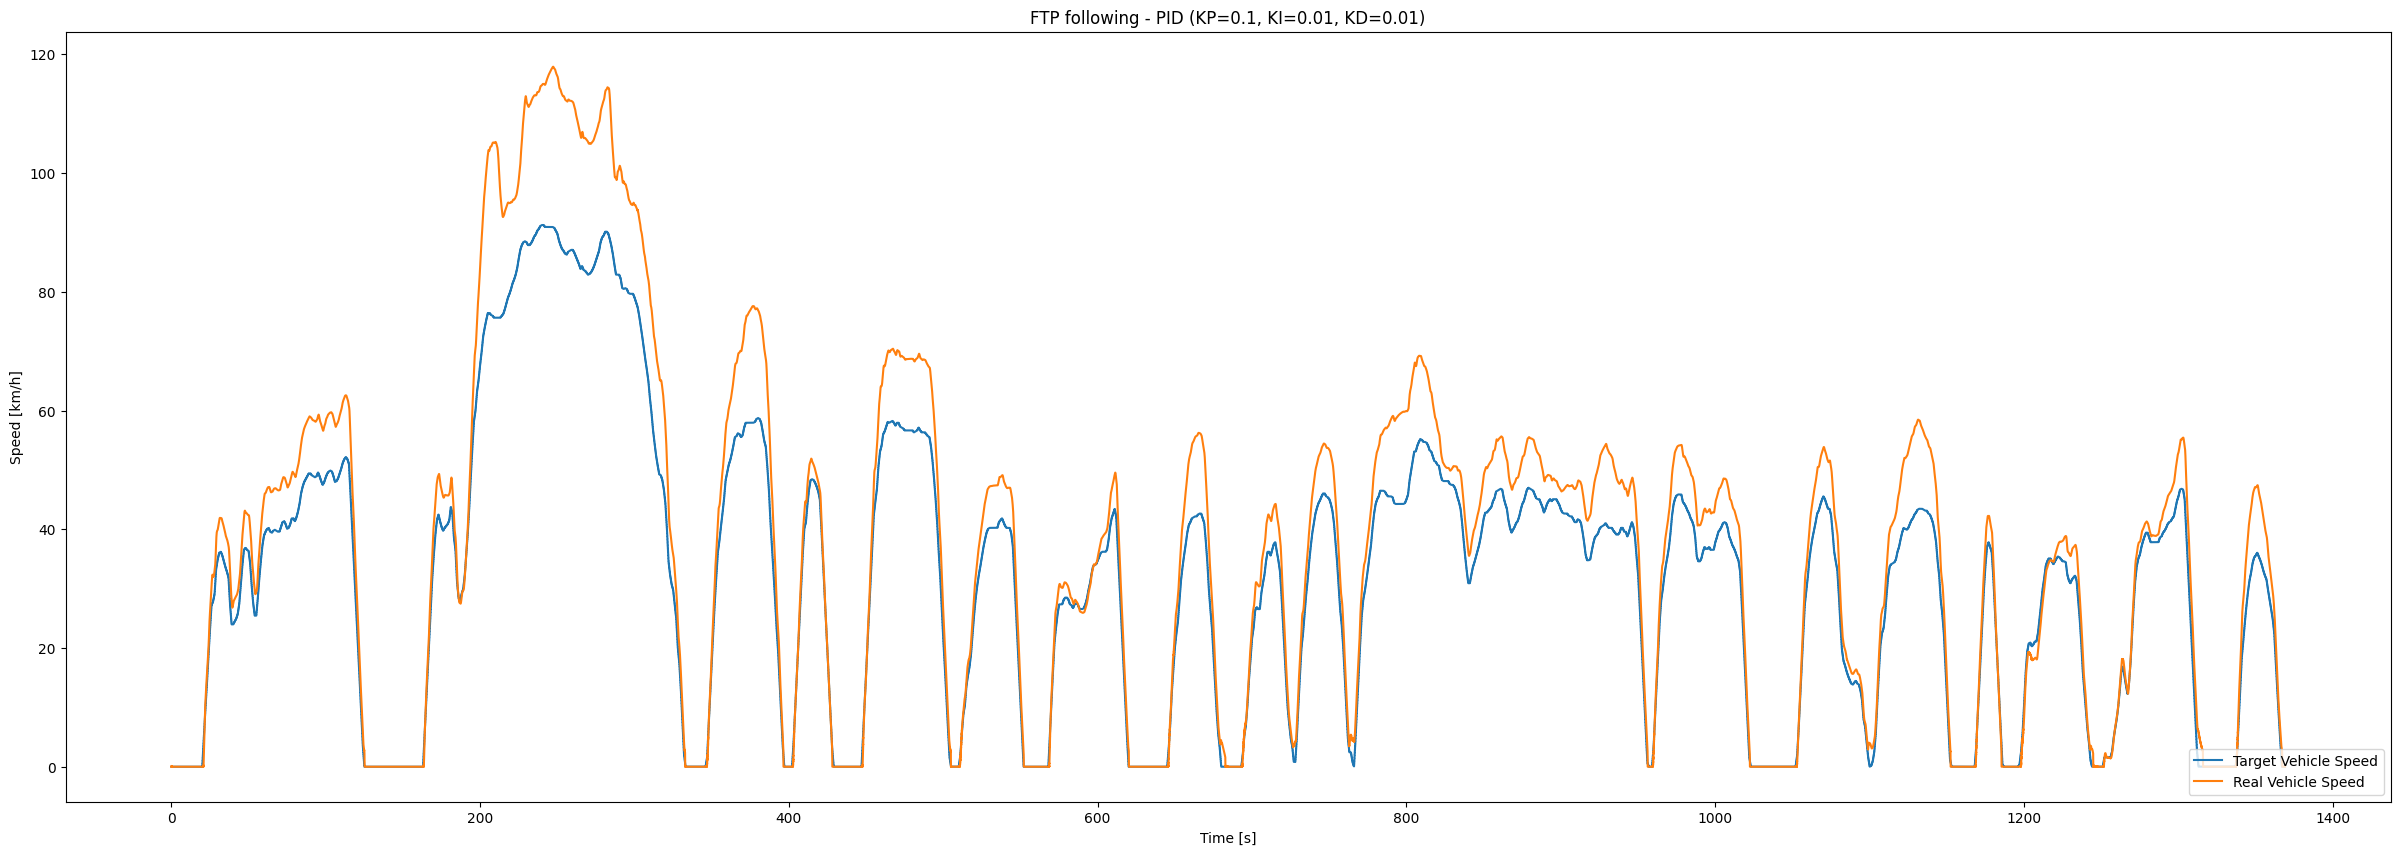

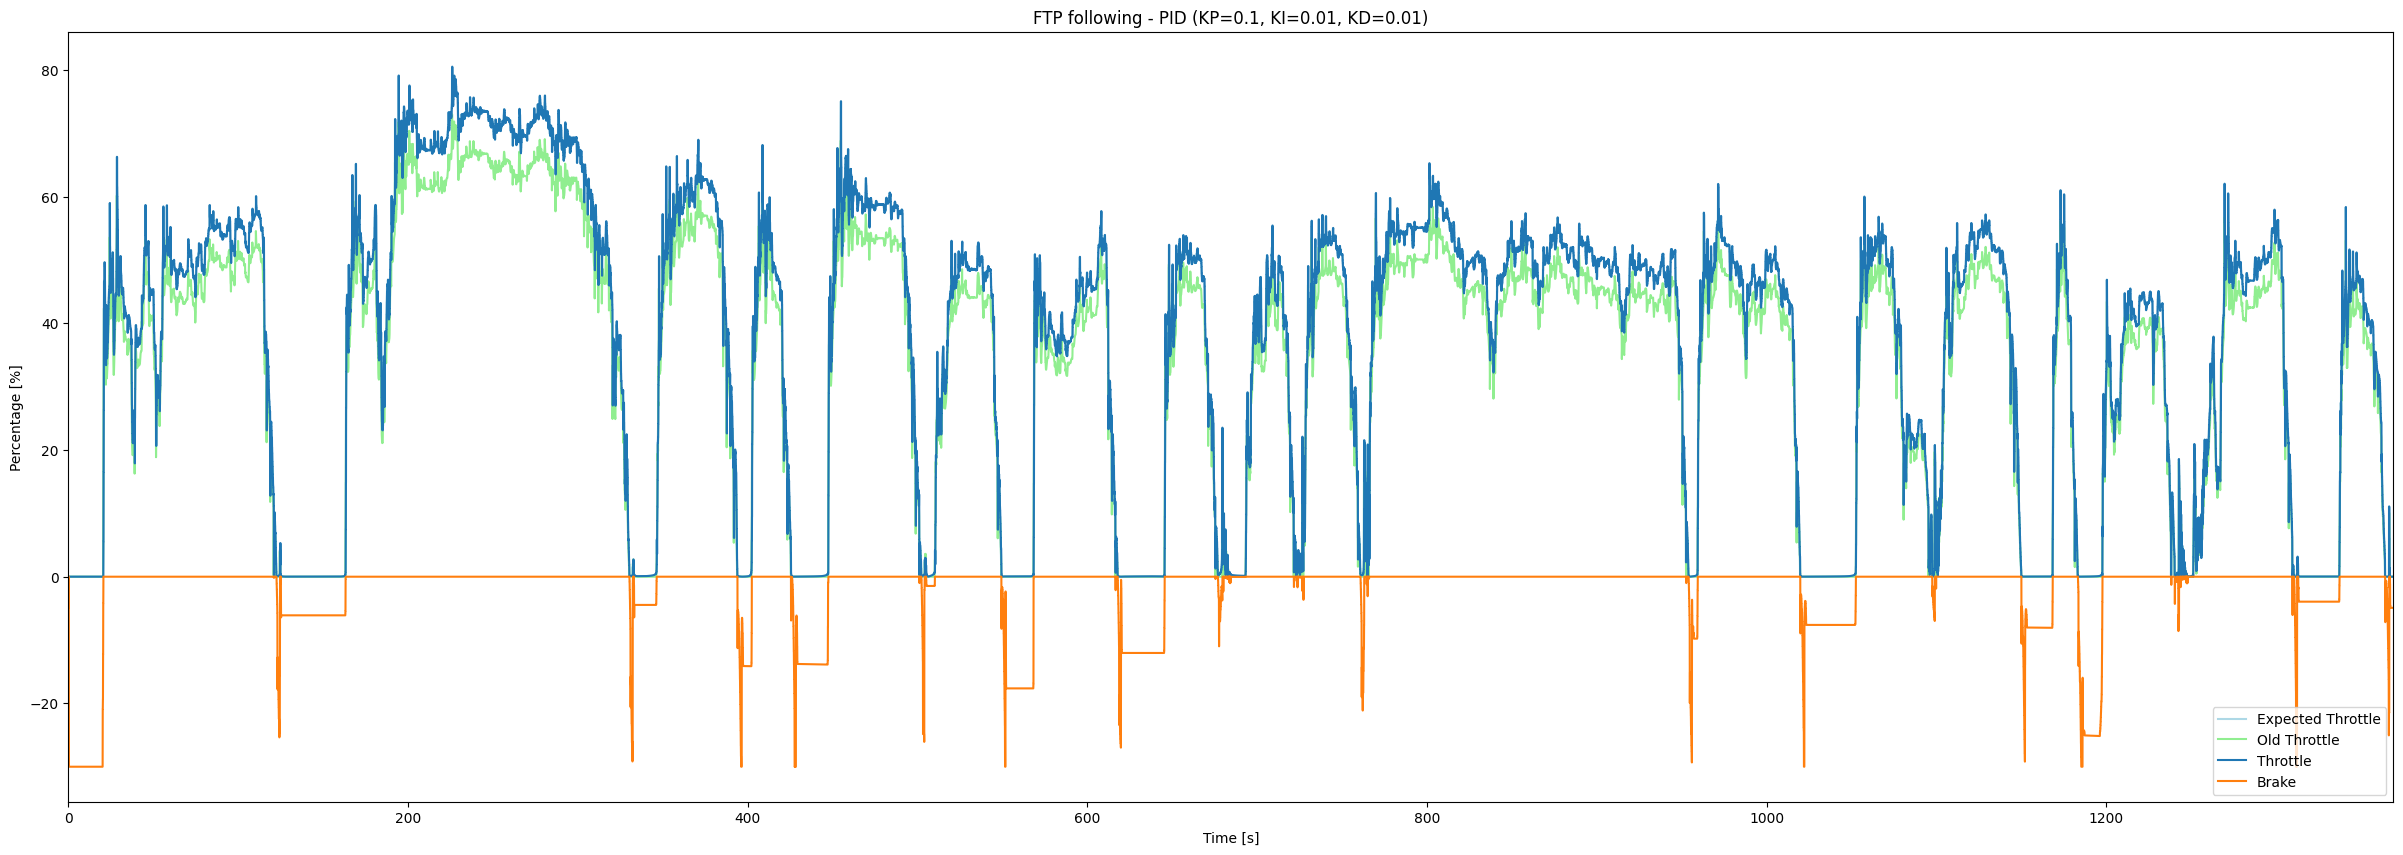

In [109]:
f_subSampling = 20 # Hz
sub_sampling = int(1 / (f_subSampling * dt))

plt.figure(figsize=(30,10))
plt.title("FTP following - PID (KP={}, KI={}, KD={})".format(KP, KI, KD))
plt.ylabel("Speed [km/h]")
plt.xlabel("Time [s]")
plt.plot(time_array, target_velocity_array, label='Target Vehicle Speed')
plt.plot(time_array, velocity_array, label='Real Vehicle Speed')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(30,10))
plt.title("FTP following - PID (KP={}, KI={}, KD={})".format(KP, KI, KD))
plt.ylabel("Percentage [%]")
plt.xlabel("Time [s]")
plt.xlim(0, time_array[-1])
# plt.xlim(30, 40)
plt.plot(x_t[:-1], 100 * np.array(new_y_tp, dtype=float), label='Expected Throttle', color='lightblue')
plt.plot(x_t, 100 * np.array(y_tp, dtype=float), label='Old Throttle', color='lightgreen')
plt.plot(time_array, 100 * np.array(throttle_array, dtype=float), label='Throttle')
plt.plot(time_array, -100 * np.array(brake_array, dtype=float), label='Brake')   
plt.legend(loc="lower right")
plt.show()

In [110]:
np.std(np.array(target_velocity_array, dtype=float) - np.array(velocity_array, dtype=float))

6.376794977878577

In [111]:
f, Sxx = esd(new_y_tp, f_update)

print("Aggressiveness Index: ", np.mean(Sxx) / np.std(np.array(target_velocity_array, dtype=float) - np.array(velocity_array, dtype=float)))

Aggressiveness Index:  6.852355526568879


In [112]:
f, Sxx = esd(y_tp, f_update)
print("Old Aggressiveness Index: ", np.mean(Sxx) / np.std(np.array(y_tv, dtype=float) - np.array(y_rv, dtype=float)))

Old Aggressiveness Index:  117.1701797143799
